<a href="https://colab.research.google.com/github/adrien-simard/AutoRegression/blob/master/TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse et synthese par modèle Autoregressif
L'objectif de cet exercice est de traduire en python le code matlab fournit afin d'obtenir une meilleur maitrise des modèle autorégressifs (AR) 

In [24]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np

On commence par définir les coefficient de notre modèle autoregressif.



In [25]:
n=1536 #  nombre de donnees a genener

a=[
    [1,-0.1344,0.9025], # coefficients du premier processus AR
    [1,-1.6674,0.9025], # Ccoefficients du second processus AR
    [1, 1.7820,0.8100]  # coefficients du troisieme processus AR
]

On définit nos 3 series temporelles selon le type d'équation suivante :
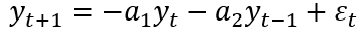 

In [26]:
t=range(-2,n-1)

y=[k*0 for k in t]

for k in range(1,int(n/3)):
    y[k+1]=-a[0][1]*y[k]-a[0][2]*y[k-1]+aleas.gauss(0,1)
for k in range(int(n/3)+1,2*int(n/3)):
    y[k+1]=-a[1][1]*y[k]-a[1][2]*y[k-1]+aleas.gauss(0,1)
for k in range(2*int(n/3)+1,n):
    y[k+1]=-a[2][1]*y[k]-a[2][2]*y[k-1]+aleas.gauss(0,1)
y=y[3:]  # suppression des donnees transitoires
t=t[3:]


On trace la juxtaposition ces séries 3 :

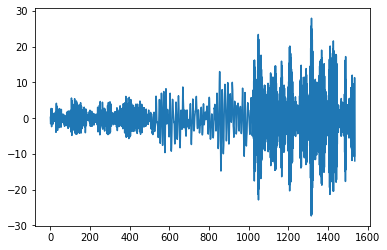

In [27]:
plt.plot(t,y,label='Data = juxtapososition de 3 sous-series stationnaires')
plt.show()

In [28]:
def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)

In [29]:
f,mag=spectre(a[0],a[1],a[2])
spectre1 = mag[0]
spectre2 = mag[1]
spectre3 = mag[2]


On trace les spectres de nos séries

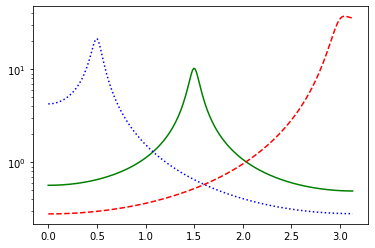

In [30]:
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)

plt.show()

In [31]:
def AR(m1,m2,nomserie,spectre2):
	"""
	:param m1: debut intervalle
	:param m2: fin intervalle
	:param nomserie: nom de la série observé
	:param spectre2: vrai spectre comparé aux resultats
	:type m1: int
	:type m2: int
	:type nomserie: string
	:type spectre2: spectre
	:return: La serie temporelles et la comparaison entre les spectres estimés de l'ordre 3 et 4 et le vrai spectre
  :rtype: plt.show
	"""
    D = np.cov([
	y[m1:m2] + [0, 0, 0, 0],
	[0] + y[m1:m2] + [0, 0, 0],
	[0, 0] + y[m1:m2] + [0, 0],
	[0, 0, 0] + y[m1:m2] + [0],
	[0, 0, 0, 0] + y[m1:m2]])

    E = - np.linalg.inv(D[0:4, 0:4]) @ D[0, 1:5].reshape(4, 1)  # ordre 4
    H = - np.linalg.inv(D[0:3, 0:3]) @ D[0, 1:4].reshape(3, 1)  # ordre 3
    E1 = np.append([1], E)  # vecteur de coefficients incluant a0(ordre 4)
    H1 = np.append([1], H)
    
    #tracé de la série entre 0 et m1
    plt.plot(t[m1:m2],y[m1:m2],label='Data = juxtapososition de 3 sous-series stationnaires')
    plt.title(nomserie)
    plt.show()
    # Tracé des spectres estimés
    f, mag = spectre(E1, H1)
    # Calcul des spectres des trois sous-series
    plt.semilogy(
    	f, mag[0],
    	f, mag[1],
    	':r',
        f,spectre2,':b',
        linewidth=4,
    )
    plt.title('Spectre / Calcul sur l intervalle [{} {}]'.format(m1,m2))
    plt.legend(['ordre4', 'ordre3',"vrai spectre"])
    return  plt.show()

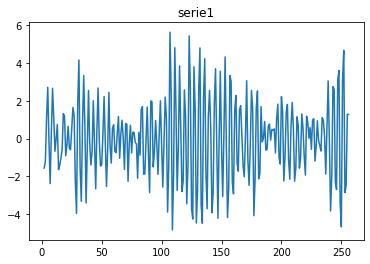

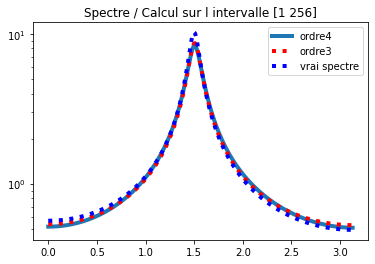

In [32]:
m1=256
m2=350
AR(1,m1,"serie1",spectre1)


In [ ]:
On voit ci-dessus que les spectres correspond parfaitement, le modèle est donc bon

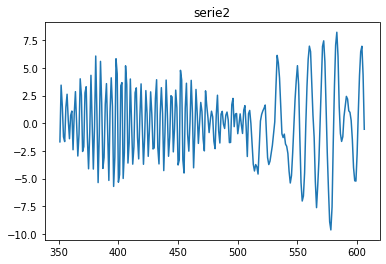

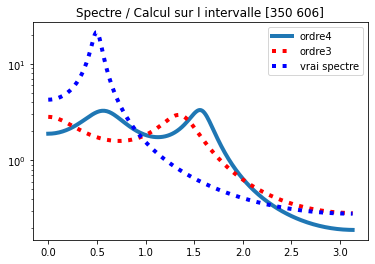

In [33]:
AR(m2,m1+m2,"serie2",spectre2)

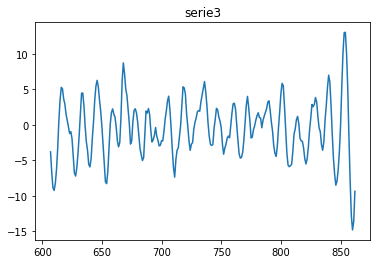

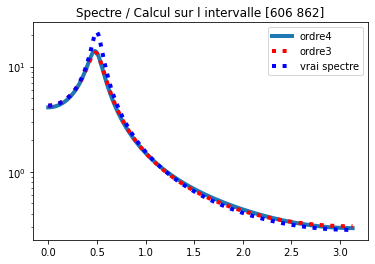

In [34]:
AR(m2+m1,2*m1+m2,"serie3",spectre2)

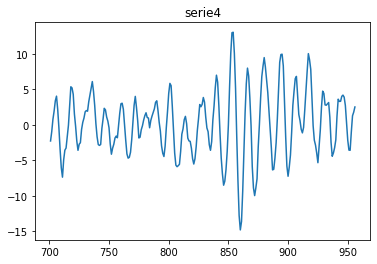

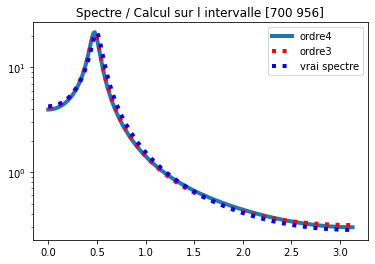

In [35]:
AR(2*m2,m1+2*m2,"serie4",spectre2)

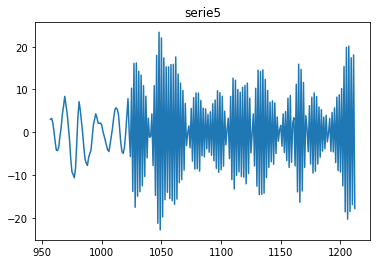

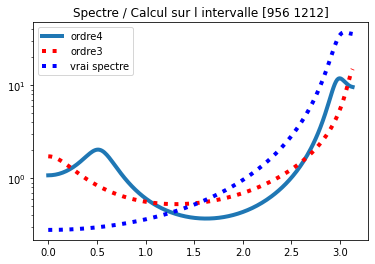

In [36]:
AR(2*m2+m1,2*m1+2*m2,"serie5",spectre3)

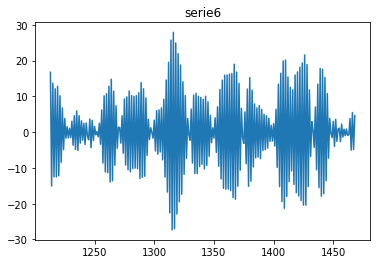

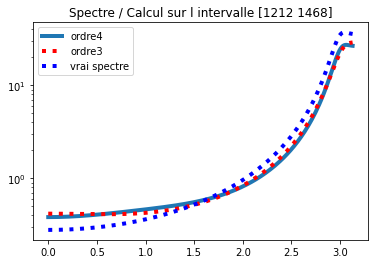

In [37]:
AR(2*m2+2*m1,3*m1+2*m2,"serie6",spectre3)